<a href="https://colab.research.google.com/github/saadghojaria55/Auto_ML/blob/main/NVR_data_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

import yfinance as yf

In [ ]:
start_date = datetime(2021,1,1)
end_date = datetime(2021,12,31)
NVR = yf.download('NVR',start_date ,end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
NVR.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
NVR

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600
...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900


In [ ]:
NVR["Date"] = NVR.index
NVR

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700,2021-01-04
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,2021-01-05
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400,2021-01-06
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600,2021-01-07
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600,2021-01-08
...,...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400,2021-12-23
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600,2021-12-27
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900,2021-12-28


In [ ]:
NVR = NVR[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
NVR.reset_index(drop=True, inplace=True)
print(NVR.head())

        Date         Open         High          Low        Close    Adj Close  \
0 2021-01-04  4089.979980  4106.790039  3988.000000  4040.649902  4040.649902   
1 2021-01-05  4025.199951  4049.989990  3965.000000  4008.909912  4008.909912   
2 2021-01-06  3970.000000  4021.489990  3892.000000  3966.489990  3966.489990   
3 2021-01-07  3997.479980  4080.729980  3977.030029  4025.929932  4025.929932   
4 2021-01-08  4040.689941  4077.000000  3892.669922  3930.000000  3930.000000   

   Volume  
0   23700  
1   26800  
2   29400  
3   29600  
4   44600  


In [ ]:
NVR

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700
1,2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800
2,2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400
3,2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600
4,2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600
...,...,...,...,...,...,...,...
246,2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400
247,2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
248,2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900
249,2021-12-29,5880.479980,5962.430176,5861.790039,5959.330078,5959.330078,7800


In [ ]:
NVR['Year'] = pd.to_datetime(NVR['Date']).dt.year
NVR['Month'] = pd.to_datetime(NVR['Date']).dt.month
NVR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700,2021,1
1,2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,2021,1
2,2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400,2021,1
3,2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600,2021,1
4,2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600,2021,1
...,...,...,...,...,...,...,...,...,...
246,2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400,2021,12
247,2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600,2021,12
248,2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900,2021,12
249,2021-12-29,5880.479980,5962.430176,5861.790039,5959.330078,5959.330078,7800,2021,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


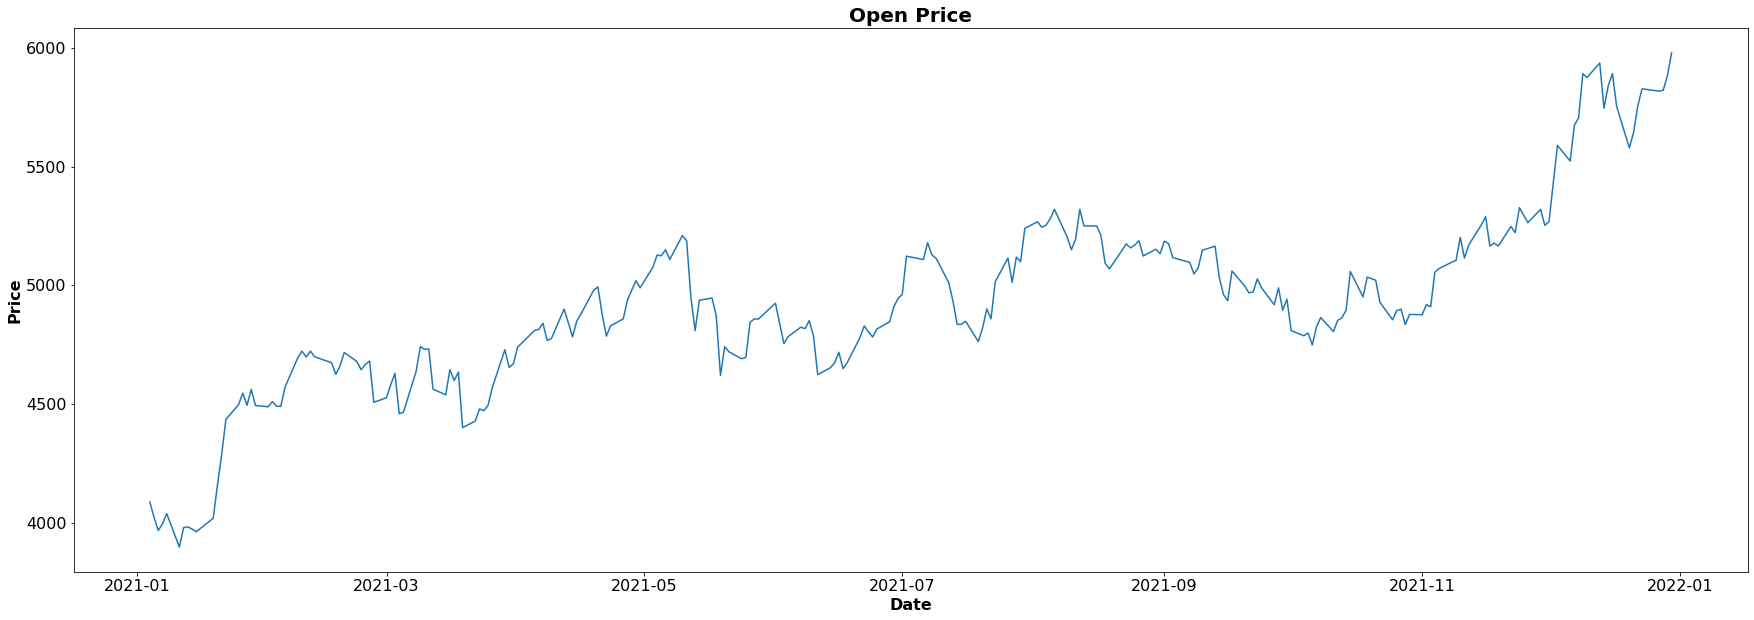

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.lineplot(NVR['Date'], NVR['Open'])

# Formatting
ax.set_title('Open Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


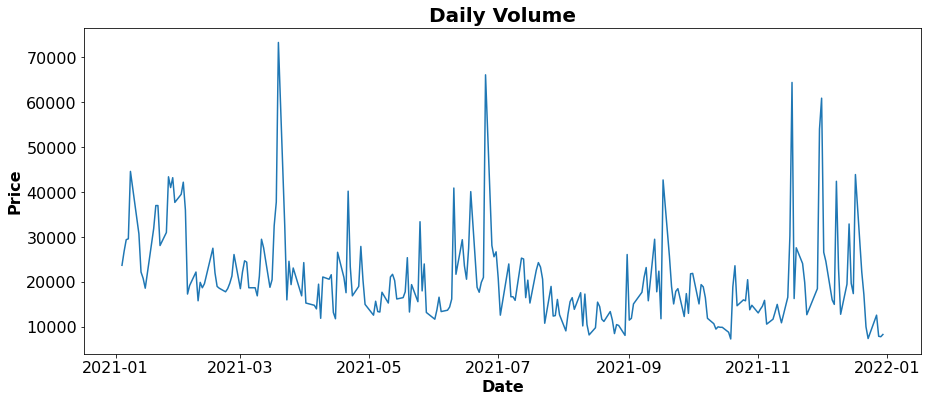

In [ ]:
# Plot Daily Volume Lineplot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(NVR['Date'], NVR['Volume'] )

ax.set_title('Daily Volume', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


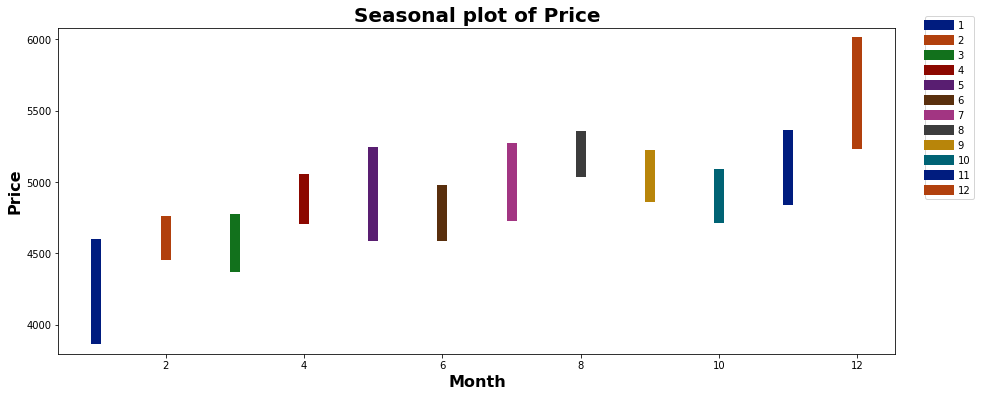

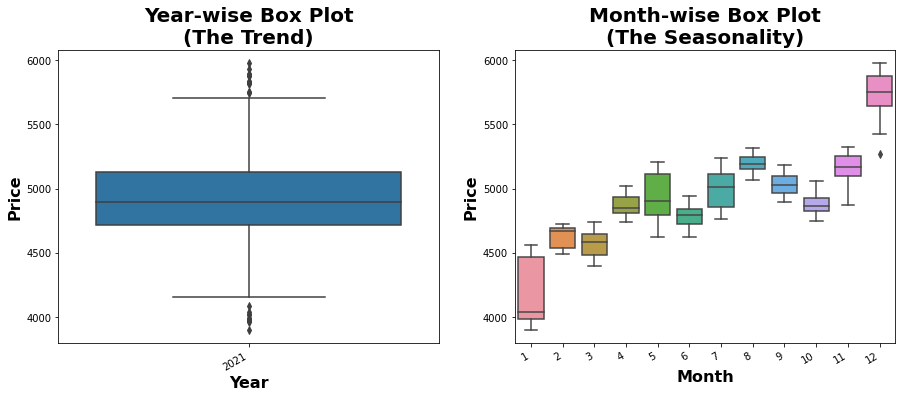

In [ ]:
variable = 'Open'
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(NVR['Month'], NVR[variable], hue = NVR['Month'],palette=sns.color_palette('dark', n_colors=12),estimator=None,
    linewidth=10)
ax.set_title('Seasonal plot of Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
ax.legend(labels = [str(1+i) for i in range(12)], bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(NVR['Year'], NVR[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(NVR['Month'], NVR[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

fig.autofmt_xdate()

In [ ]:
# Aggregating the Time Series to a monthly scaled index
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

y = NVR[['Date','Open','Close']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

y

,Open,Close
Date,,
2021-01-31,4180.893683,4202.109465
2021-02-28,4629.831569,4638.136333
2021-03-31,4582.933933,4599.272631
2021-04-30,4869.907599,4883.727167
2021-05-31,4926.995947,4915.592993
2021-06-30,4786.618186,4787.964555
2021-07-31,5001.581450,5018.800479
2021-08-31,5195.485463,5191.126376
2021-09-30,5033.646159,5015.083845


Text(0, 0.5, 'Close')

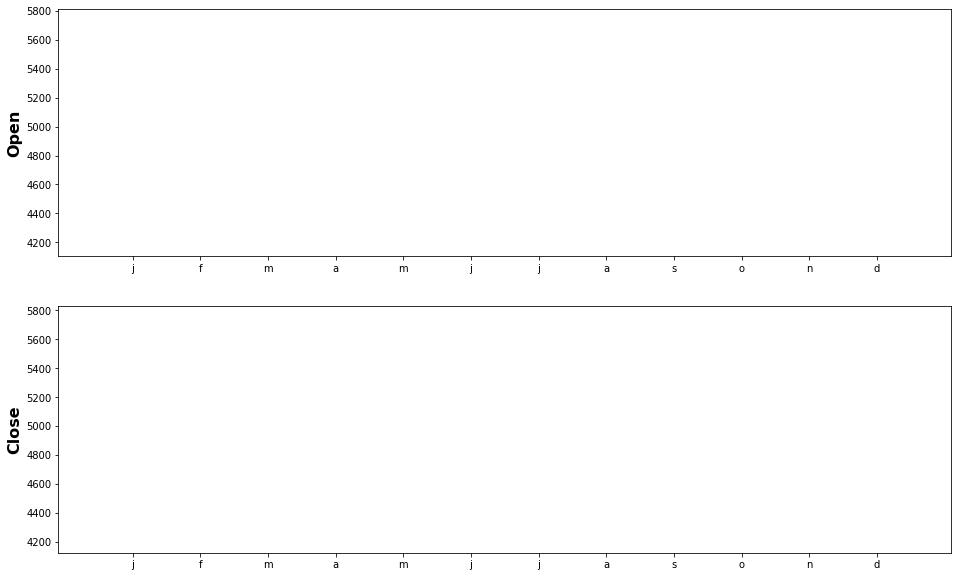

In [ ]:
# The magic
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
month_plot(y['Open'], ax=ax[0]);
ax[0].set_ylabel('Open', fontsize = 16, fontdict=dict(weight='bold'))
month_plot(y['Close'], ax=ax[1]);
ax[1].set_ylabel('Close', fontsize = 16, fontdict=dict(weight='bold'))

In [ ]:
y

,Open,Close
Date,,
2021-01-31,4180.893683,4202.109465
2021-02-28,4629.831569,4638.136333
2021-03-31,4582.933933,4599.272631
2021-04-30,4869.907599,4883.727167
2021-05-31,4926.995947,4915.592993
2021-06-30,4786.618186,4787.964555
2021-07-31,5001.581450,5018.800479
2021-08-31,5195.485463,5191.126376
2021-09-30,5033.646159,5015.083845


Text(0.5, 0.98, 'Open decomposition')

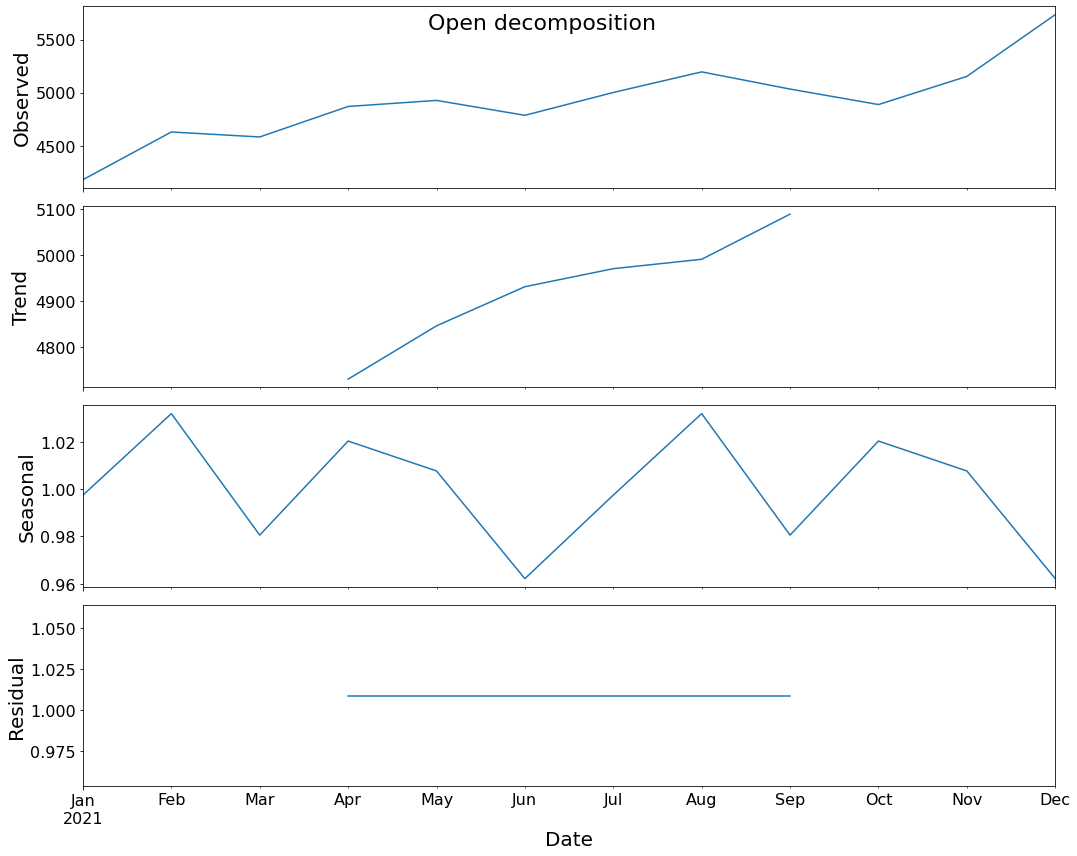

In [ ]:

y = NVR[['Date','Open']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Setting rcparams
plt.rcParams['figure.figsize'] = 15, 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', freq = 6)
decomp = decomposition.plot()
decomp.suptitle('Open decomposition', fontsize=22)

[1.         0.95385508 0.90889815 0.86782347 0.83036935 0.78568425
 0.73858394 0.69868907 0.6653688  0.62773824 0.58833731 0.55229478
 0.52494334 0.49583692 0.47168033 0.44455353 0.42180866 0.39749818
 0.38245601 0.35961049 0.33929467 0.31918195 0.2980648  0.27328822
 0.25444228 0.23669086 0.22276099 0.20652192 0.19679015 0.18611719
 0.17439337 0.16050564 0.15295268 0.15132808 0.15139831 0.1437724
 0.14327092 0.14347198 0.13992467 0.13199952 0.13052581 0.12852906
 0.12431802 0.11837796 0.11888132 0.12044843 0.11960826 0.12259489
 0.11788146 0.11064828 0.10483909 0.10423146 0.10843268 0.1043077
 0.10083903 0.09998159 0.10112039 0.10118713 0.09956757 0.10106311
 0.10416283]


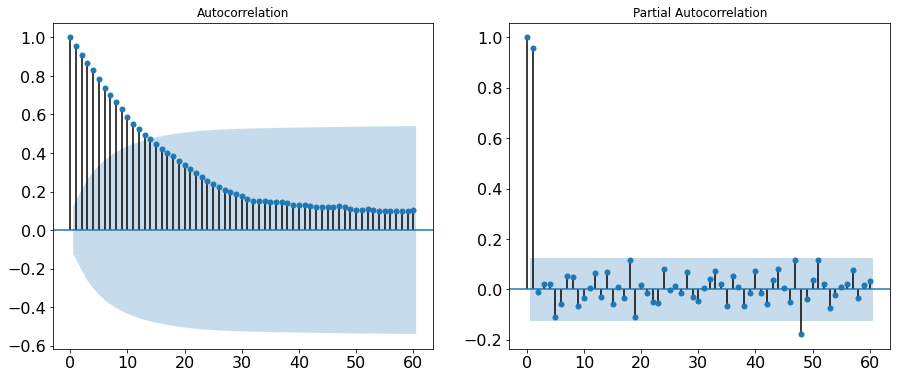

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(NVR['Open'], nlags=60, fft=False)
print(autocorr)

plot_acf(NVR['Open'].tolist(), lags=60, ax=ax[0], fft=False);
plot_pacf(NVR['Open'].tolist(), lags=60, ax=ax[1]);


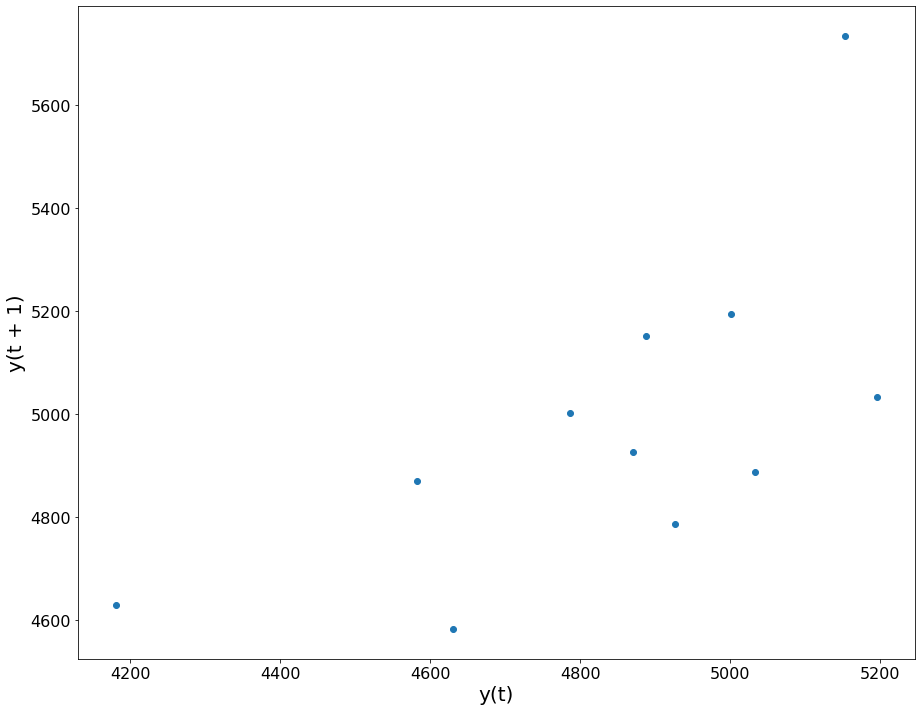

In [ ]:
lag_plot(y['Open']);

## Moving Average

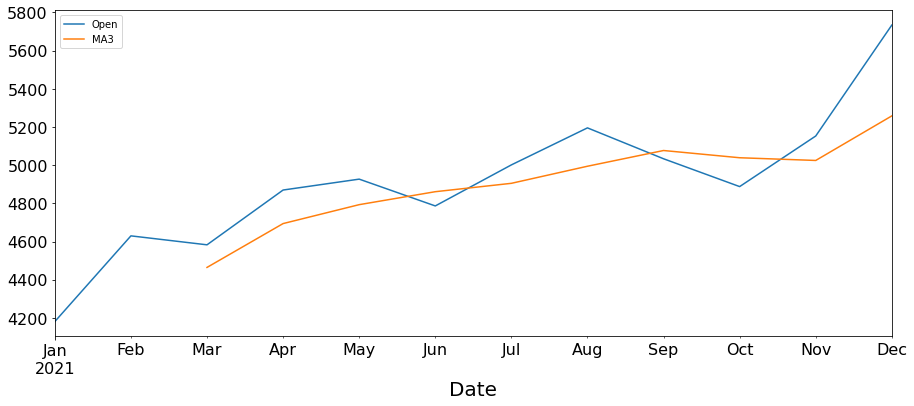

In [ ]:
y = NVR[['Date','Open']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

y['MA3'] = y.rolling(window=3).mean() 
y.plot(figsize=(15,6));


## Exponential Smoothing

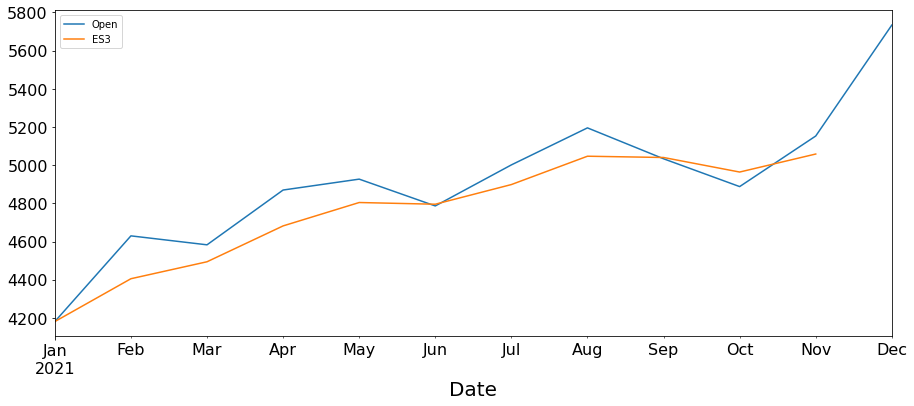

In [ ]:
span = 3
# Weights of observations
alpha = 2/(span+1)

# Plot Simple exponential smoothing
y['ES3'] = SimpleExpSmoothing(y['Open']).fit(smoothing_level = alpha, optimized = False).fittedvalues.shift(-1)
y[['Open','ES3']].plot(figsize=(15,6));


In [ ]:
NVR = NVR.reindex(index=NVR.index[::-1])
NVR

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
250,2021-12-30,5977.609863,5978.160156,5884.060059,5906.029785,5906.029785,8300,2021,12
249,2021-12-29,5880.479980,5962.430176,5861.790039,5959.330078,5959.330078,7800,2021,12
248,2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900,2021,12
247,2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600,2021,12
246,2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400,2021,12
...,...,...,...,...,...,...,...,...,...
4,2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600,2021,1
3,2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600,2021,1
2,2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400,2021,1
1,2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,2021,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


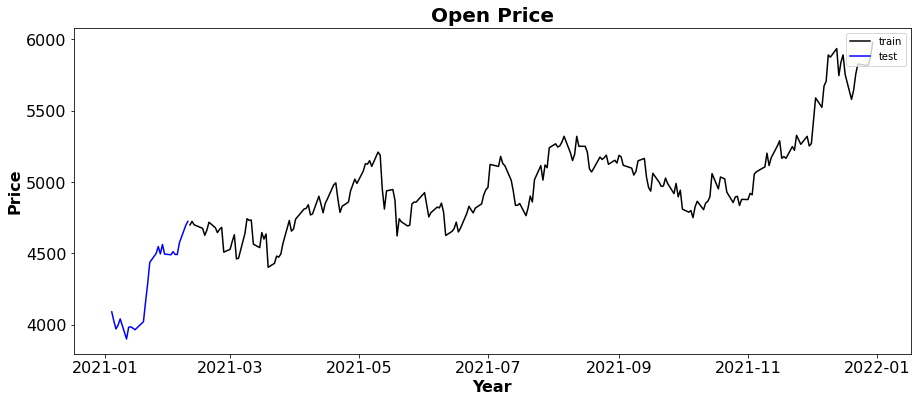

In [ ]:
# Split data into train and validation set 90/10
NVR_train, NVR_test = NVR[:int(len(NVR)*0.9)], NVR[int(len(NVR)*0.9):]

# Index disappeared, put them back
NVR_test = NVR_test.set_index('Date', drop=False)
NVR_train = NVR_train.set_index('Date', drop=False)

# Line plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(NVR_train['Date'], NVR_train['Open'], color = 'black')
sns.lineplot(NVR_test['Date'], NVR_test['Open'], color = 'blue')

# Formatting
ax.set_title('Open Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(NVR_train['Open'], order = (1, 1, 2))
# disp=-1: no output
fitted = model.fit(disp = -1)
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: ignored

In [ ]:
print(NVR_train.shape)
print(NVR_test.shape)
print(NVR.shape)

(225, 9)
(26, 9)
(251, 9)


In [ ]:
fc, se, conf = fitted.forecast(225, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=NVR_train.index)
lower_series = pd.Series(conf[:, 0], index=NVR_train.index)
upper_series = pd.Series(conf[:, 1], index=NVR_train.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(NVR_train['Open'], label='training')
plt.plot(NVR_test['Open'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('NVR Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: ignored

In [ ]:
!pip install pmdarima

from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(NVR_train['Open'])

""", 
                             start_p = 0, 
                             start_q = 0,
                             test = 'adf', # use adftest to find optimal 'd'
                             max_p = 3,
                             max_q = 3, # maximum p and q
                             m = 7, # frequency of series
                             seasonal = False,
                             start_P = 0, 
                             D = 0, 
                             trace = True,
                             error_action = 'ignore',  
                             stepwise = True
"""

print(model_autoARIMA.summary())


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.0 MB/s 
     |████████████████████████████████| 9.8 MB 52.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1289.661
Date:                Wed, 22 Jun 2022   AIC                           2593.323
Time:                        00:11:02   BIC                           2617.204
Sample:                             0   HQIC                          2602.962
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6103      0.164     -3.727      0.000      -0.931      -0.289
ar.L2         -0.4113      0.178     -2.308      0.021      -0.761      -0.062
ar.L3         -0.7662      0.145     -5.283      0.0

In [ ]:
# Report performance
mse = mean_squared_error(NVR_test['Open'], fc[0:26])
print('MSE: '+str(mse))
mae = mean_absolute_error(NVR_test['Open'], fc[0:26])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(NVR_test['Open'], fc[0:26]))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc[0:26] - NVR_test['Open'])/np.abs(NVR_test['Open']))
print('MAPE: '+str(mape))

NameError: ignored

In [ ]:
accuracy=100-(mape*100)
print(accuracy)